In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, SGDRegressor, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [2]:
laptop = pd.read_csv('C:/DataProject/laptops.csv')
laptop.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
laptop.shape

(2160, 12)

In [4]:
total = laptop.isnull().sum().sort_values(ascending=False)
percent = (laptop.isnull().sum()/laptop.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
GPU,1371,0.634722
Storage type,42,0.019444
Screen,4,0.001852
Laptop,0,0.000000
Status,0,0.000000
Brand,0,0.000000
Model,0,0.000000
CPU,0,0.000000
RAM,0,0.000000
Storage,0,0.000000


In [5]:
laptop.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [6]:
laptop.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

lb = LabelEncoder()
laptop.drop(['Laptop'],axis=1, inplace = True)
laptop['Touch'] = lb.fit_transform(laptop['Touch'])
laptop['CPU'] = lb.fit_transform(laptop['CPU'])
laptop['Model'] = lb.fit_transform(laptop['Model'])
laptop['Brand'] = lb.fit_transform(laptop['Brand'])
laptop['Status'] = lb.fit_transform(laptop['Status'])

laptop['GPU'].fillna("No", inplace=True)
laptop['Storage type'].fillna("No", inplace=True)
mean_value = laptop['Screen'].mean()
laptop['Screen'].fillna(value=mean_value, inplace=True)
laptop['Storage type'] = lb.fit_transform(laptop['Storage type'])
laptop['GPU'] = lb.fit_transform(laptop['GPU'])
laptop.head()

C:\Users\effen\AppData\Local\Temp\ipykernel_1580\3045992695.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laptop['GPU'].fillna("No", inplace=True)
C:\Users\effen\AppData\Local\Temp\ipykernel_1580\3045992695.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,0,3,42,17,8,512,1,11,15.6,0,1009.00
1,0,1,54,14,8,256,1,11,15.6,0,299.00
2,0,3,42,16,8,256,1,11,15.6,0,789.00
3,0,14,58,18,16,1000,1,18,15.6,0,1199.00
4,0,9,4,17,16,512,1,11,15.6,0,669.01


In [8]:
laptop.describe()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,0.306481,8.990741,68.268981,15.508796,15.413889,596.294444,1.006481,14.084722,15.168112,0.105093,1312.638509
std,0.461139,5.751203,34.744637,4.384477,9.867815,361.220506,0.212954,5.895316,1.202214,0.306744,911.475417
min,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,10.100000,0.000000,201.050000
25%,0.000000,3.000000,42.000000,14.000000,8.000000,256.000000,1.000000,11.000000,14.000000,0.000000,661.082500
50%,0.000000,9.000000,69.000000,17.000000,16.000000,512.000000,1.000000,11.000000,15.600000,0.000000,1031.945000
75%,1.000000,13.000000,98.000000,18.000000,16.000000,1000.000000,1.000000,18.000000,15.600000,0.000000,1708.970000
max,1.000000,26.000000,120.000000,27.000000,128.000000,4000.000000,2.000000,44.000000,18.000000,1.000000,7150.470000


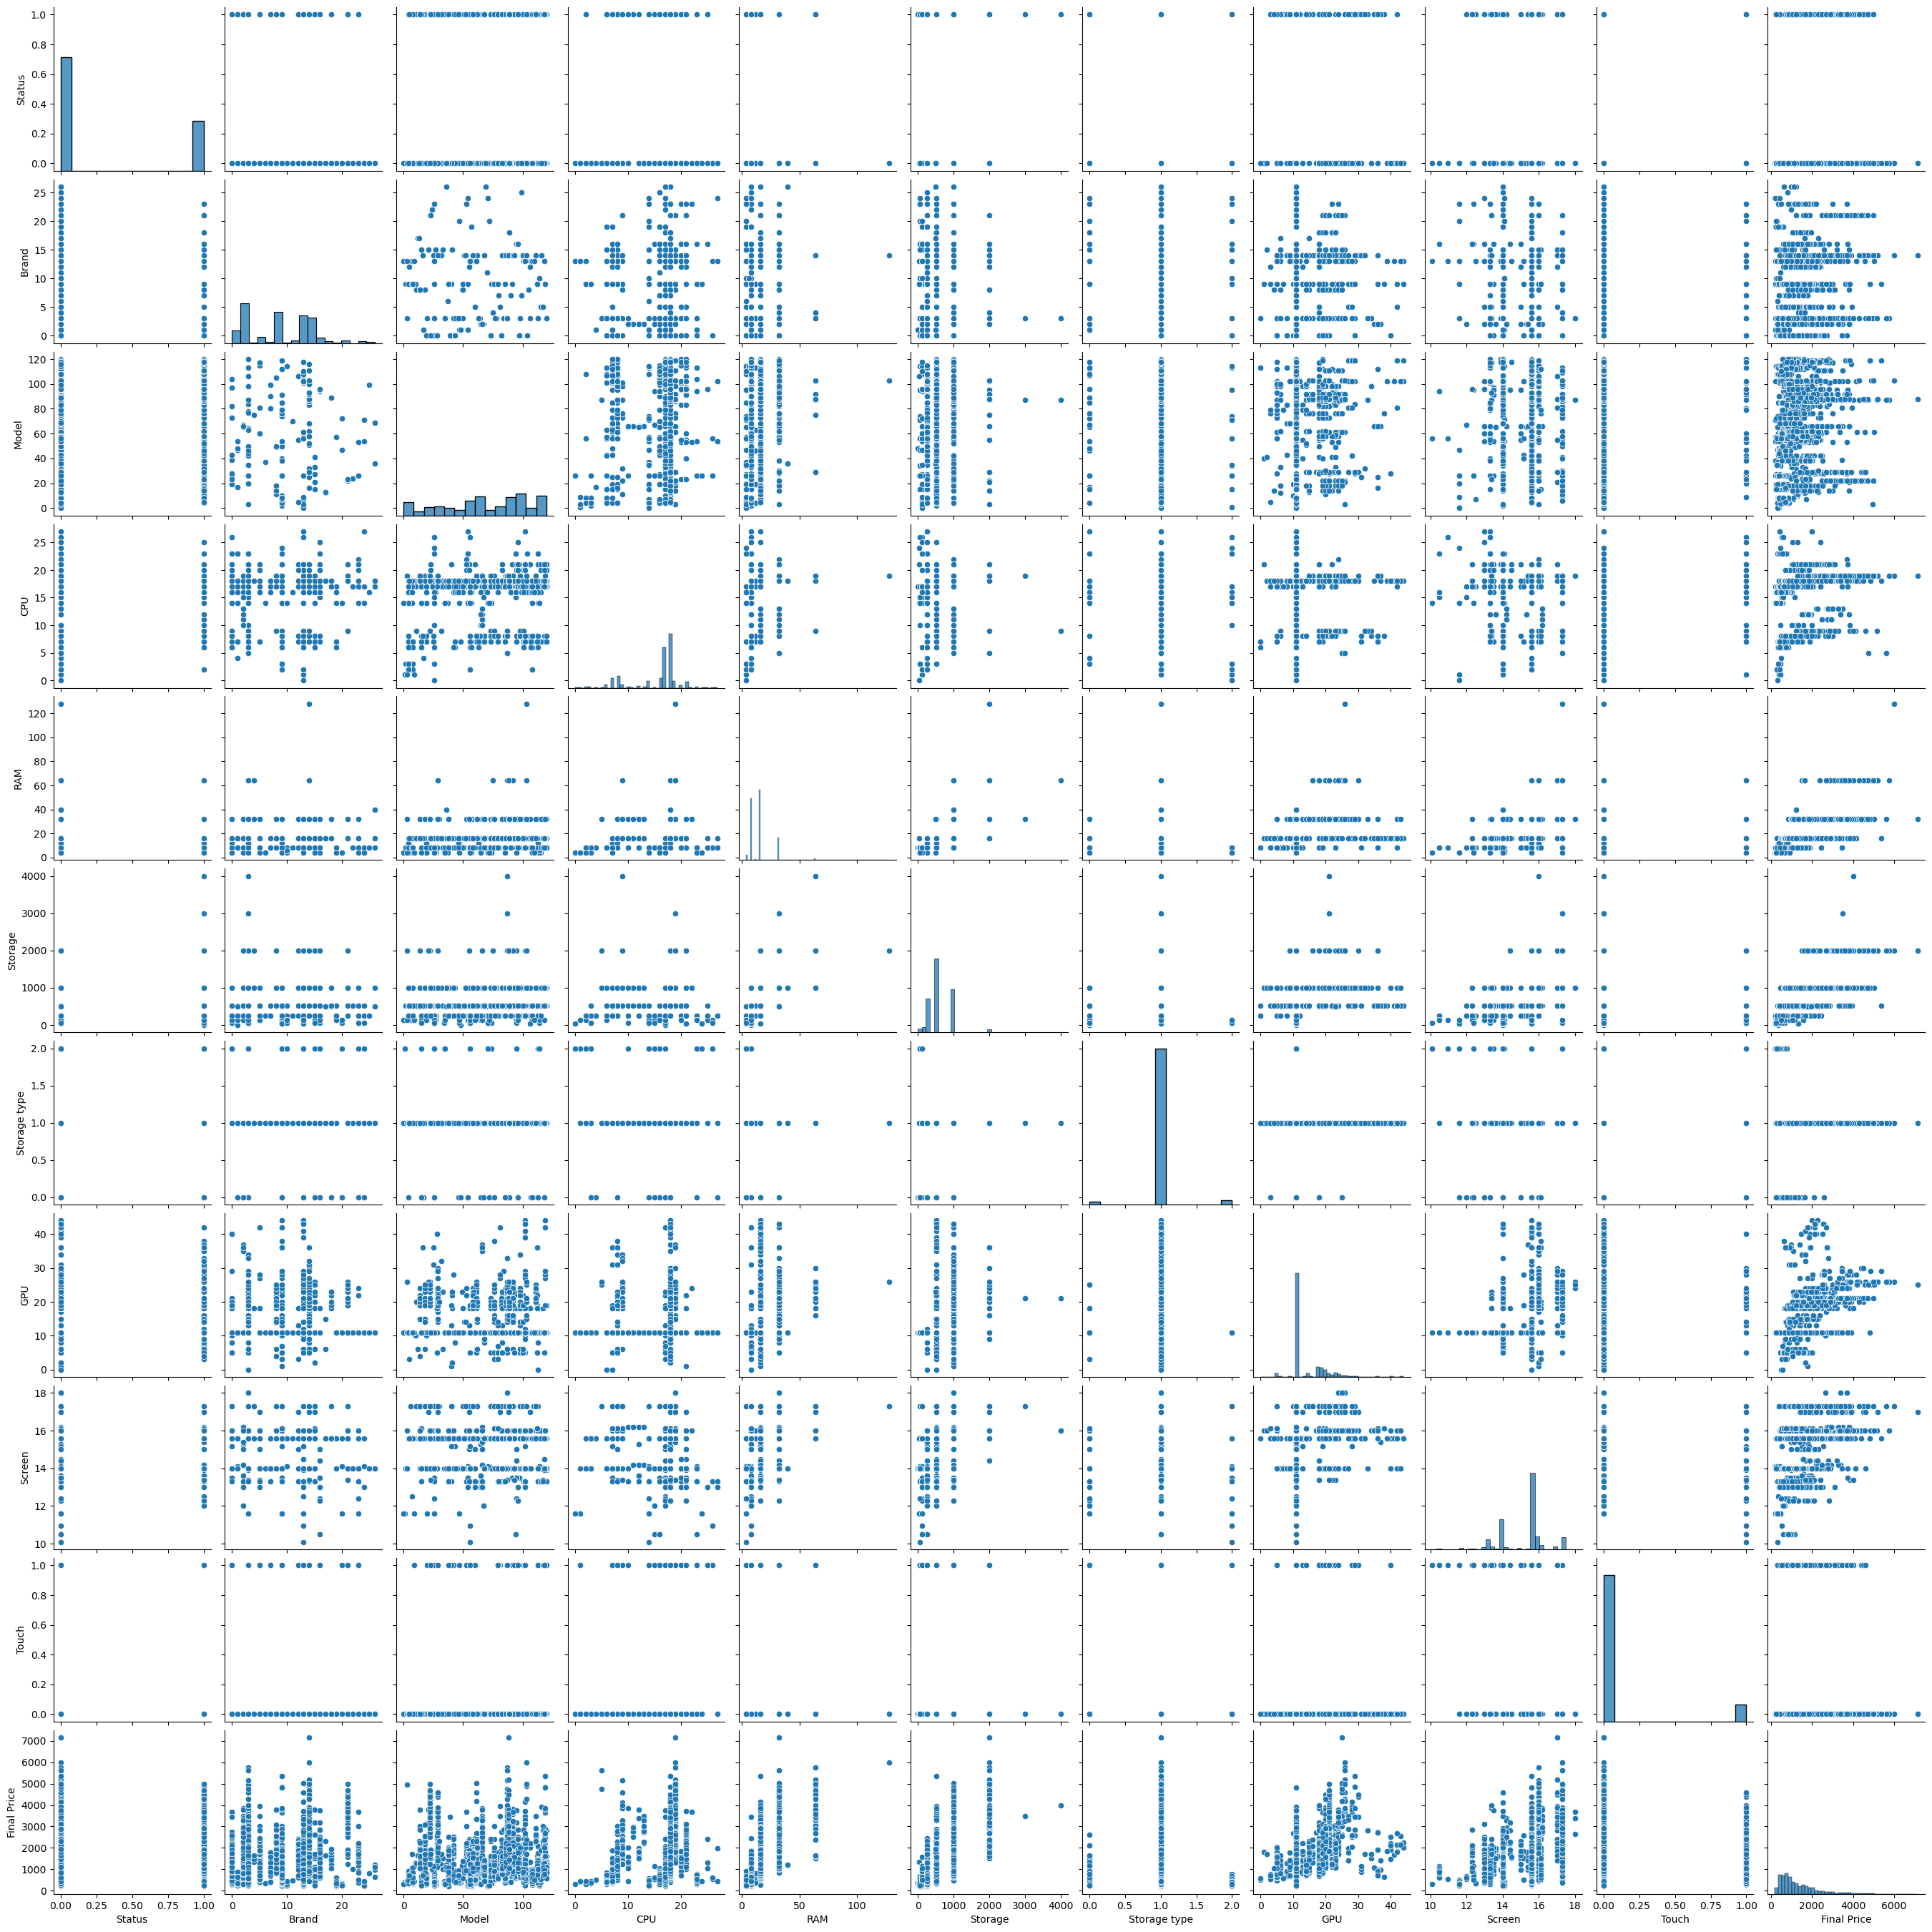

In [9]:
import seaborn as sns

sns.pairplot(laptop)

<Axes: >

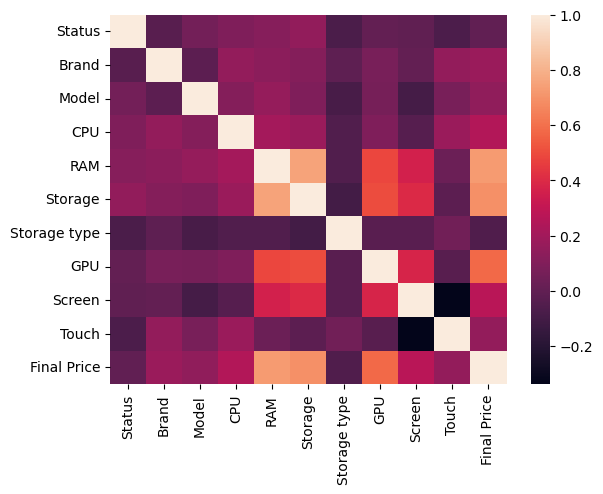

In [10]:
sns.heatmap(laptop.corr())

In [11]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
y = laptop[['Final Price']]
X = laptop.drop(['Final Price'], axis=1)
std = StandardScaler()
X = std.fit_transform(X)
y = std.fit_transform(y)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
ma = []
ms = []
mse = mean_squared_error
mae = mean_absolute_error

In [14]:
def model_training_and_score(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(mse(y_pred, y_test))
    print(mae(y_pred, y_test))
    ms.append(mse(y_pred, y_test))
    ma.append(mse(y_pred, y_test))

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, SGDRegressor, Ridge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

model = RandomForestRegressor(n_estimators=5)
model_training_and_score(model)

0.18240400240388793
0.2610385459538506


C:\Users\effen\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [16]:
model = Lasso(alpha = 0.1)
model_training_and_score(model)

0.39266603481784723
0.4418344784573304


In [17]:
model = SVR()
model_training_and_score(model)

C:\Users\effen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3083822205499062
0.31980494660075426


In [18]:
#
model = SGDRegressor()
model_training_and_score(model)

0.3448445069180653
0.3933408963068815


C:\Users\effen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
kernel = DotProduct() + WhiteKernel()
model = GaussianProcessRegressor(kernel = kernel, random_state = 0)
model_training_and_score(model)

0.3406010959631101
0.3914093078082528


In [20]:
#Decission Tree Regressor
model = DecisionTreeRegressor()
model_training_and_score(model)


0.27261100433991714
0.29394191090250854


In [21]:
#K Neighbors Regressor
model = KNeighborsRegressor()
model_training_and_score(model)

0.2705279878502428
0.3088242759625481


In [22]:
#Ridge Regression
model = Ridge(alpha=1)
model_training_and_score(model)

0.34070851963125187
0.39053439118559446


In [37]:
#Model Optimization
#Model Selection

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=10, stop=110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]
min_weight_fraction_leaf = [0,1,2,3]
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features, 
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'min_weight_fraction_leaf': min_weight_fraction_leaf}
print(random_grid)
                
               

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'min_weight_fraction_leaf': [0, 1, 2, 3]}


In [39]:
#Model Optimisasi
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 0,random_state = 42, n_jobs = -1)
rf_random.fit(X_train, y_train)

C:\Users\effen\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
267 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\effen\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\effen\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\effen\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\effen\anaconda3\Lib\site-package

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'min_weight_fraction_leaf': [0, 1, 2,
                                                                     3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

In [41]:
#Best Model Training and Score
params = rf_random.best_params_
params

{'n_estimators': 600,
 'min_weight_fraction_leaf': 0,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [45]:
model = RandomForestRegressor(n_estimators = params['n_estimators'],
                              min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                              min_samples_split = params['min_samples_split'],
                              min_samples_leaf = params['min_samples_leaf'],
                              max_features = params['max_features'],
                              max_depth = params['max_depth'],
                              bootstrap = params['bootstrap'])
model_training_and_score(model)

C:\Users\effen\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.16915295601735025
0.2381615155331525


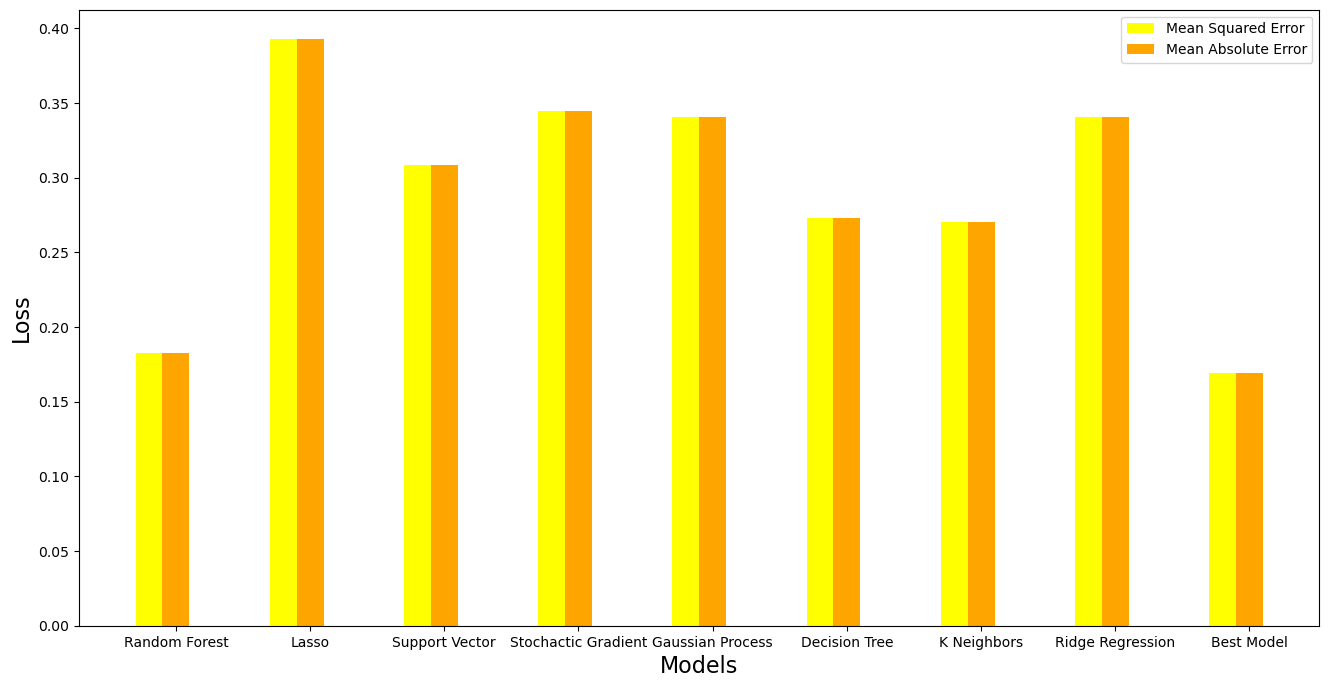

In [51]:
#Plotting Losses od different models

barwidth = 0.2
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (16,8))
br1 = np.arange(len(ms))
plt.bar(np.arange(len(ms)), ms, color='yellow', width=barwidth, label='Mean Squared Error')
br2 = [x + barwidth for x in br1]
plt.bar(br2, ma, color='orange', width=barwidth, label='Mean Absolute Error')
plt.xlabel('Models', fontsize=16)
plt.ylabel('Loss', fontsize=16)
models = ['Random Forest', 'Lasso', 'Support Vector', 'Stochactic Gradient', 'Gaussian Process', 'Decision Tree', 'K Neighbors', 'Ridge Regression', 'Best Model']
plt.xticks([r + barwidth for r in range(len(ms))], models)
plt.legend()
plt.show()